Nama: Bernard Hugo

NIM: 2540124450

Kelas: LA05

UTS Deep Learning Nomor 1

Link video:

https://binusianorg-my.sharepoint.com/personal/bernard_hugo_binus_ac_id/_layouts/15/guestaccess.aspx?share=EWb_Nb4baqxMjBEHCeHc2Q0B1GyuXsZbyKYNq6QQpkvVdQ&nav=eyJyZWZlcnJhbEluZm8iOnsicmVmZXJyYWxBcHAiOiJPbmVEcml2ZUZvckJ1c2luZXNzIiwicmVmZXJyYWxBcHBQbGF0Zm9ybSI6IldlYiIsInJlZmVycmFsTW9kZSI6InZpZXciLCJyZWZlcnJhbFZpZXciOiJNeUZpbGVzTGlua0RpcmVjdCJ9fQ&e=hiz6av

**Bagian a**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Melakukan read pada dataset**

In [ ]:
raw_df = pd.read_csv('dataset_spine.csv')
print(raw_df.head(10))

   Unnamed: 0       Col1       Col2       Col3       Col4        Col5  \
0           0  63.027817  22.552586  39.609117  40.475232   98.672917   
1           1  39.056951  10.060991  25.015378  28.995960  114.405425   
2           2  68.832021  22.218482  50.092194  46.613539  105.985135   
3           3  69.297008  24.652878  44.311238  44.644130  101.868495   
4           4  49.712859   9.652075  28.317406  40.060784  108.168725   
5           5  40.250200  13.921907  25.124950  26.328293  130.327871   
6           6  53.432928  15.864336  37.165934  37.568592  120.567523   
7           7  45.366754  10.755611  29.038349  34.611142  117.270067   
8           8  43.790190  13.533753  42.690814  30.256437  125.002893   
9           9  36.686353   5.010884  41.948751  31.675469   84.241415   

        Col6      Col7     Col8     Col9     Col10      Col11    Col12  \
0  -0.254400  0.744503  12.5661  14.5386  15.30468 -28.658501  43.5123   
1   4.564259  0.415186  12.8874  17.5323  16.784

Melakukan read pada "dataset_spine.csv", lalu menampilkan 10 data pertama dari dataset tersebut.

**Mengamati data type**

In [ ]:
print(raw_df.dtypes)

Unnamed: 0      int64
Col1          float64
Col2          float64
Col3          float64
Col4          float64
Col5          float64
Col6          float64
Col7          float64
Col8          float64
Col9          float64
Col10         float64
Col11         float64
Col12         float64
Class_att      object
dtype: object


Mengamati data type setiap kolom atau atribut pada "dataset_spine.csv". Sebagai hasilnya, Col 1 sampai Col 12 memiliki data type float dan Class_att memiliki atribut objek atau string

**Melakukan perhitungan jumlah data berdasarkan setiap kelas**

In [ ]:
class_count = raw_df['Class_att'].value_counts()
print(class_count)

Abnormal    210
Normal      100
Name: Class_att, dtype: int64


Menghitung berapa banyak data yang dimiliki oleh setiap kelas pada atribut Class_att. Kelas "Abnormal" memiliki sebanyak 210 data dan kelas "Normal" memiliki sebanyak 100 data. Kedua kelas memiliki jumlah data yang berbeda, akan dilakukan penyeimbangan pada dataset agar jumlah data yang dimiliki kedua kelas seimbang.

**Menginstall imbalanced learn**

In [ ]:
pip install imbalanced-learn

Menginstall imbalanced-learn untuk melakukan penyeimbangan sehingga, kedua kelas pada Class_att yaitu Abnormal dan Normal memiliki jumlah data yang sama.

In [ ]:
# Menyeimbangkan jumlah data berdasarkan banyaknya kelas yang ada di Class_att

from imblearn.over_sampling import SMOTE

x = raw_df.drop('Class_att', axis=1)
y = raw_df['Class_att']

sampling_strategy = {'Abnormal':210, 'Normal':210}

sm = SMOTE(sampling_strategy = sampling_strategy, k_neighbors = len(sampling_strategy) - 1)
x_sm, y_sm = sm.fit_resample(x, y)

df_balance = pd.concat([x_sm, y_sm], axis=1)
print(df_balance)
print(df_balance["Class_att"].value_counts())

     Unnamed: 0       Col1       Col2       Col3       Col4        Col5  \
0             0  63.027817  22.552586  39.609117  40.475232   98.672917   
1             1  39.056951  10.060991  25.015378  28.995960  114.405425   
2             2  68.832021  22.218482  50.092194  46.613539  105.985135   
3             3  69.297008  24.652878  44.311238  44.644130  101.868495   
4             4  49.712859   9.652075  28.317406  40.060784  108.168725   
..          ...        ...        ...        ...        ...         ...   
415         275  40.050785   1.538023  33.051429  38.512762  118.814162   
416         271  42.709353  14.660648  38.258130  28.048705  121.444224   
417         287  71.131165  15.465272  55.179821  55.665893  108.900426   
418         281  64.588383  14.687246  43.842935  49.901137  115.784722   
419         242  51.215082  14.112434  33.706854  37.102648  125.742568   

          Col6      Col7       Col8       Col9      Col10      Col11  \
0    -0.254400  0.744503  1

Sebagai hasilnya, kedua kelas (Abnormal dan Normal) memiliki jumlah data yang sama yaitu 210 data. SMOTE merupakan sebuah function yang bergua untuk menangani data yang jumlahnya tidak seimbang. Parameter yang digunakan, adalah sampling_strategy untuk menentukan berapa banyak jumlah data untuk disampling pada setiap kelas. Parameter k_neighbors merupakan neigbors terdekat untuk menentukan lingkungan sampel yang akan digunakan untuk menghasilkan sampel yang bagus. Diisi dengan nilai len(sampling_strategy) berupa 2 dan dikurang dengan 1 menjadi 1. Setelah itu, dilakukan resample atau pencocokan jumlah data yang disimpan ke dalam variabel x dan y yang sudah dilakukan resample. Variabel x dan y digabung untuk menghasilkan sebuah dataframe yang seimbang.


In [ ]:
# Mengecek data null

null_data = df_balance.isnull().sum()
print(null_data)

Unnamed: 0    0
Col1          0
Col2          0
Col3          0
Col4          0
Col5          0
Col6          0
Col7          0
Col8          0
Col9          0
Col10         0
Col11         0
Col12         0
Class_att     0
dtype: int64


Tidak ada data-data yang null pada semua kolom atau atribut.

In [ ]:
# Membuang kolom yang tidak penting

df_balance = df_balance.drop(["Unnamed: 0"], axis = 1)
df_balance

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.566100,14.538600,15.304680,-28.658501,43.512300,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.887400,17.532300,16.784860,-25.530607,16.110200,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.834300,17.486100,16.658970,-29.031888,19.222100,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.560300,12.707400,11.424470,-30.470246,18.832900,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.494000,15.954600,8.872370,-16.378376,24.917100,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
415,40.050785,1.538023,33.051429,38.512762,118.814162,-3.396639,0.501457,27.862154,14.143787,10.698962,-10.515122,19.625088,Normal
416,42.709353,14.660648,38.258130,28.048705,121.444224,6.119014,0.115053,15.596239,16.482125,8.075321,-33.866746,29.500319,Normal
417,71.131165,15.465272,55.179821,55.665893,108.900426,1.096851,0.246265,19.575639,15.427280,9.984135,-32.752333,16.642191,Normal
418,64.588383,14.687246,43.842935,49.901137,115.784722,5.851458,0.033929,30.990959,15.372189,16.091707,-5.405806,33.555103,Normal


Kolom Unnamed:0 tidak penting, karena kolom tersebut hanya berperan sebagai nomor ID.

In [ ]:
df_balance.describe()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,58.140093,16.200116,49.810715,41.939977,119.437105,19.967076,0.455735,21.384661,13.125042,11.776713,-14.747206,25.947195
std,16.213361,9.444280,17.184738,12.320055,12.298477,34.034444,0.271565,8.690225,3.198163,2.760486,12.359440,10.422351
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,45.031512,9.971614,36.666451,33.161719,113.799257,0.526542,0.232461,13.169764,10.757075,9.362780,-25.523815,17.152300
50%,55.703066,15.006480,46.983449,40.886988,120.079446,5.394223,0.455035,21.907150,13.148986,11.780216,-15.819455,24.955783
75%,68.640228,20.445296,60.097139,49.798016,126.476302,31.865506,0.673053,29.160750,15.627676,13.886919,-3.875393,34.701957
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


Melakukan perhitungan deskriptif statistik pada dataframe. Untuk melihat nilai count, mean (rata-rata), standar deviasi, nilai minimum, 25%, 50%, 75%, dan nilai maksimum.

In [ ]:
abnormal_df = df_balance[df_balance['Class_att'] == 'Abnormal']
normal_df = df_balance[df_balance['Class_att'] == 'Normal']

print(abnormal_df)
print(normal_df)

          Col1       Col2       Col3       Col4        Col5        Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917   -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425    4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135   -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495   11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725    7.918501   
..         ...        ...        ...        ...         ...         ...   
205  80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
206  95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
207  74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
208  87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
209  48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

         Col7     Col8     Col9     Col10      Col11    Col12 Class_att  
0    0.744503  12.5661  1

**Memvisualisasikan data-data di dataframe dengan membuat scatter plot**

Text(0, 0.5, 'Values')

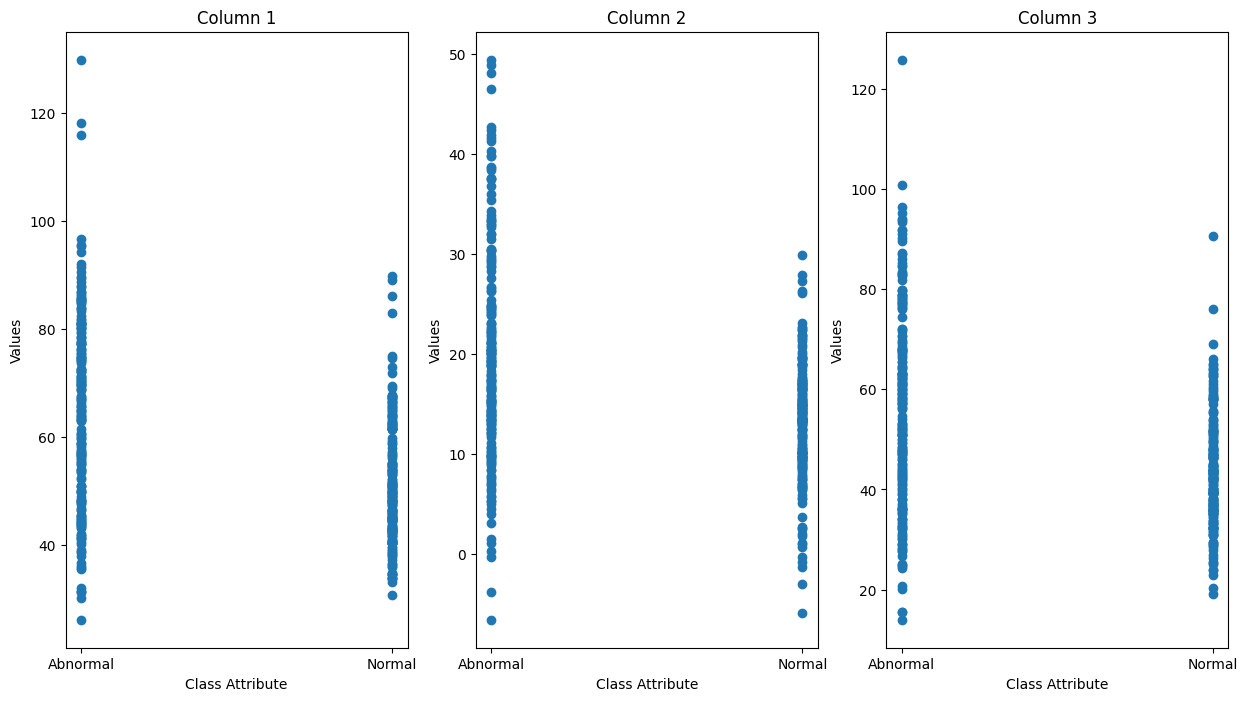

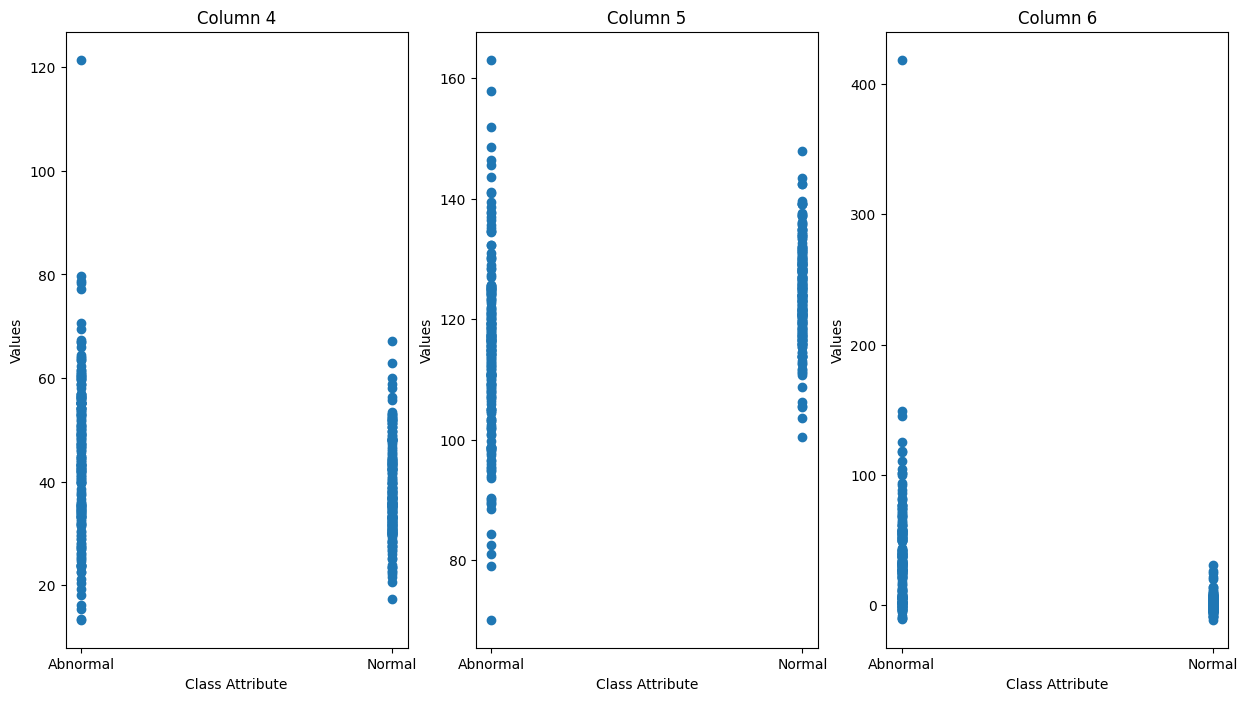

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15, 8))

ax1.scatter(df_balance["Class_att"], df_balance["Col1"])
ax1.set_title('Column 1')
ax1.set_xlabel('Class Attribute')
ax1.set_ylabel('Values')

ax2.scatter(df_balance["Class_att"], df_balance["Col2"])
ax2.set_title('Column 2')
ax2.set_xlabel('Class Attribute')
ax2.set_ylabel('Values')

ax3.scatter(df_balance["Class_att"], df_balance["Col3"])
ax3.set_title('Column 3')
ax3.set_xlabel('Class Attribute')
ax3.set_ylabel('Values')

ax4.scatter(df_balance["Class_att"], df_balance["Col4"])
ax4.set_title('Column 4')
ax4.set_xlabel('Class Attribute')
ax4.set_ylabel('Values')

ax5.scatter(df_balance["Class_att"], df_balance["Col5"])
ax5.set_title('Column 5')
ax5.set_xlabel('Class Attribute')
ax5.set_ylabel('Values')

ax6.scatter(df_balance["Class_att"], df_balance["Col6"])
ax6.set_title('Column 6')
ax6.set_xlabel('Class Attribute')
ax6.set_ylabel('Values')

Text(0, 0.5, 'Values')

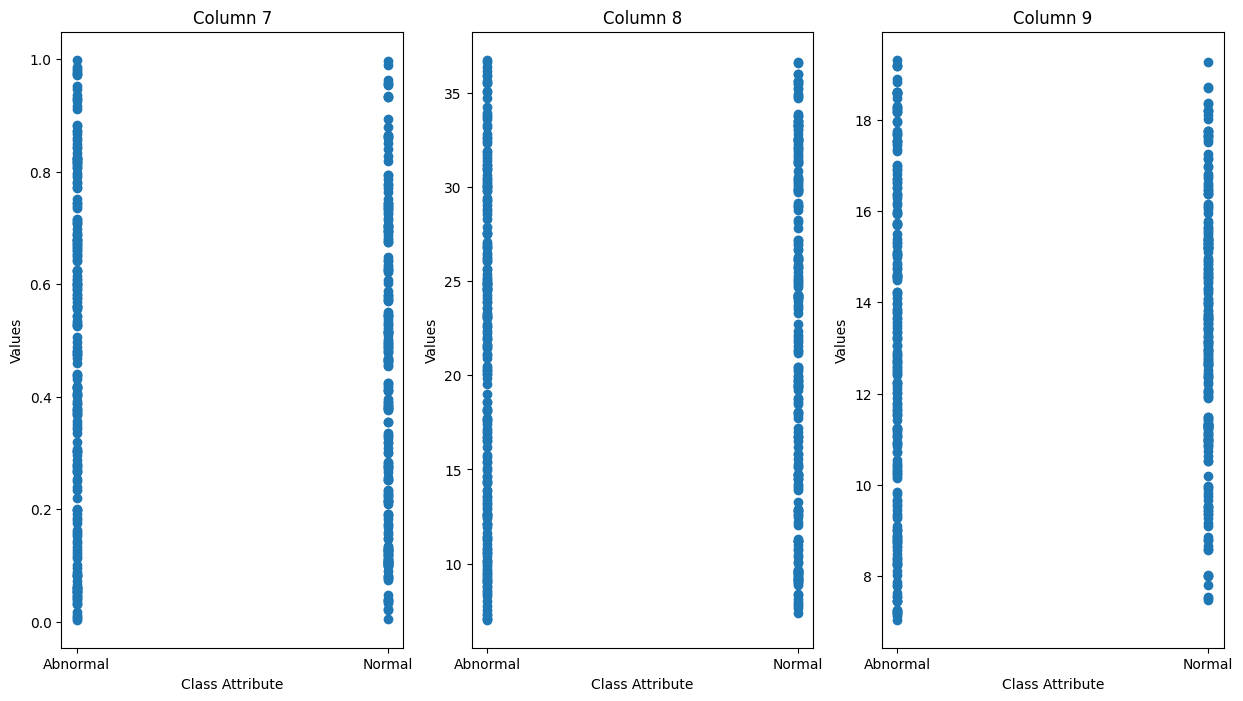

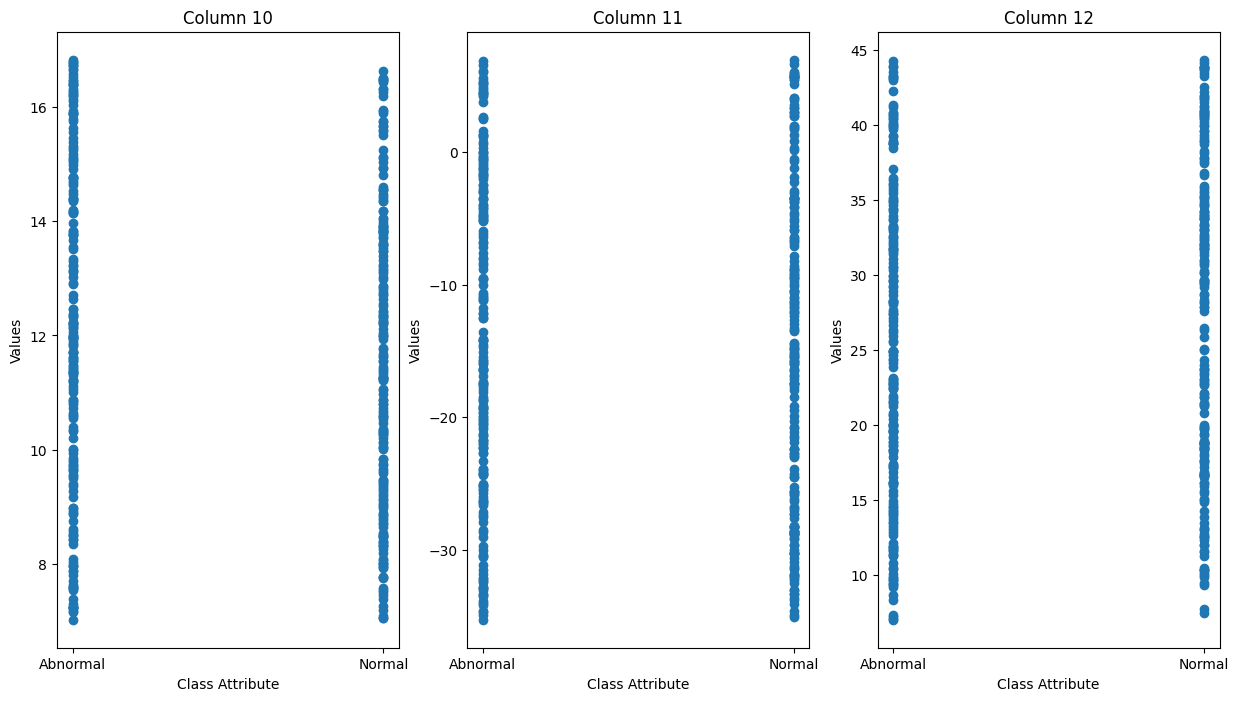

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 8))
fig, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(15, 8))

ax1.scatter(df_balance["Class_att"], df_balance["Col7"])
ax1.set_title('Column 7')
ax1.set_xlabel('Class Attribute')
ax1.set_ylabel('Values')

ax2.scatter(df_balance["Class_att"], df_balance["Col8"])
ax2.set_title('Column 8')
ax2.set_xlabel('Class Attribute')
ax2.set_ylabel('Values')

ax3.scatter(df_balance["Class_att"], df_balance["Col9"])
ax3.set_title('Column 9')
ax3.set_xlabel('Class Attribute')
ax3.set_ylabel('Values')

ax4.scatter(df_balance["Class_att"], df_balance["Col10"])
ax4.set_title('Column 10')
ax4.set_xlabel('Class Attribute')
ax4.set_ylabel('Values')

ax5.scatter(df_balance["Class_att"], df_balance["Col11"])
ax5.set_title('Column 11')
ax5.set_xlabel('Class Attribute')
ax5.set_ylabel('Values')

ax6.scatter(df_balance["Class_att"], df_balance["Col12"])
ax6.set_title('Column 12')
ax6.set_xlabel('Class Attribute')
ax6.set_ylabel('Values')

Dengan dibuatnya scatterplot, bisa membantu mengetahui distribusi berbagai data.

**Melakukan encoding mengubah data kategorikal menjadi numerik**

In [ ]:
from sklearn.preprocessing import LabelEncoder

class_att = df_balance['Class_att']
encoded_class_att = LabelEncoder().fit_transform(class_att)
print(encoded_class_att)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]


Sebagai hasilnya, data-data pada "Class_att" telah diubah ke numerik

In [ ]:
df = df_balance.iloc[:, 0:12]
df['Class_att'] = encoded_class_att
print(df)

          Col1       Col2       Col3       Col4        Col5       Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917  -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425   4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135  -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495  11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725   7.918501   
..         ...        ...        ...        ...         ...        ...   
415  40.050785   1.538023  33.051429  38.512762  118.814162  -3.396639   
416  42.709353  14.660648  38.258130  28.048705  121.444224   6.119014   
417  71.131165  15.465272  55.179821  55.665893  108.900426   1.096851   
418  64.588383  14.687246  43.842935  49.901137  115.784722   5.851458   
419  51.215082  14.112434  33.706854  37.102648  125.742568  11.708733   

         Col7       Col8       Col9      Col10      Col11      Col12  \
0    0.744503  12.566100  14.538600  15

Data-data pada variabel Class_att telah diubah dari kategorik menjadi numerik. Supaya mudah dalam melakukan train test split.

In [ ]:
null_data = df.isnull().sum()
print(null_data)

Col1         0
Col2         0
Col3         0
Col4         0
Col5         0
Col6         0
Col7         0
Col8         0
Col9         0
Col10        0
Col11        0
Col12        0
Class_att    0
dtype: int64


In [ ]:
abnormal_df = df[df['Class_att'] == 0]
normal_df = df[df['Class_att'] == 1]

print(abnormal_df)
print(normal_df)

          Col1       Col2       Col3       Col4        Col5        Col6  \
0    63.027817  22.552586  39.609117  40.475232   98.672917   -0.254400   
1    39.056951  10.060991  25.015378  28.995960  114.405425    4.564259   
2    68.832021  22.218482  50.092194  46.613539  105.985135   -3.530317   
3    69.297008  24.652878  44.311238  44.644130  101.868495   11.211523   
4    49.712859   9.652075  28.317406  40.060784  108.168725    7.918501   
..         ...        ...        ...        ...         ...         ...   
205  80.111572  33.942432  85.101608  46.169139  125.593624  100.292107   
206  95.480229  46.550053  59.000000  48.930176   96.683903   77.283072   
207  74.094731  18.823727  76.032156  55.271004  128.405731   73.388216   
208  87.679087  20.365613  93.822416  67.313473  120.944829   76.730629   
209  48.259920  16.417462  36.329137  31.842457   94.882336   28.343799   

         Col7     Col8     Col9     Col10      Col11    Col12  Class_att  
0    0.744503  12.5661  

Dari eksplorasi yang telah saya lakukan, saya menemukan masalah dimana dataset memiliki jumlah data dengan setiap kelas yang tidak seimbang dan variabel target bertipe kategorik. Untuk menyeimbangkan jumlah data, saya menggunakan SMOTE karena bagus untuk menyelesaikannya dengan tujuan meningkatkan performa model ANN dan mencegah bias terhadap kelas yang memiliki data yang lebih banyak serta mengurangi terjadinya overfitting.

Untuk encoding saya menggunakan metode LabelEncoder untuk mengubah data kategorikal menjadi numerikal. Karena, merupakan metode yang lebih praktis, sederhana, dan caranya sangat efektif untuk mengubah data kategorikal di suatu dataset menjadi data numerik. Hal ini bertujuan untuk meningkatkan performa dari model dalam melakukan training.


**Bagian b**

**Membagi dataset menjadi train, test, and validation dengan proporsi: 80% train, 10% test, and 10% validation**

In [ ]:
# Melakukan pengacakan pada data-data dalam dataframe

df_shuffle = df.sample(frac=1).reset_index(drop=True)

Sebelum dibagi menjadi train, test, dan validation, dilakukan pengacakan data agar distribusinya menjadi merata saat dilakukan training pada model ANN.

In [ ]:
train_data, test_data, val_data = np.split(df_shuffle, [int(0.8*len(df)), int(0.9*len(df))])

Didapatkan proporsi training data sebesar 80%, testing data, dan validation data sebesar 10%

In [ ]:
x_train = train_data.drop('Class_att', axis=1)
y_train = train_data['Class_att']

x_test = test_data.drop('Class_att', axis=1)
y_test = test_data['Class_att']

x_val = val_data.drop('Class_att', axis=1)
y_val = val_data['Class_att']

Setelah dilakukan split menjadi train, test, dan validation, lakukan pemecahan lagi menjadi dua data yang berupa data x yang merupakan variabel independen dan y yang merupakan variabel dependen.

**Bagian c**

**Membuat model ANN dan train**

In [ ]:
import tensorflow as tf
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(512, activation='sigmoid'),
    Dense(256, activation='sigmoid'),
    Dense(128, activation='sigmoid'),
    Dense(2, activation='softmax')
])

In [ ]:
model.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

train_model = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50)

Epoch 1/50
11/11 [==============================] - 1s 29ms/step - loss: 0.6644 - accuracy: 0.5774 - val_loss: 0.5188 - val_accuracy: 0.8571
Epoch 2/50
11/11 [==============================] - 0s 12ms/step - loss: 0.4925 - accuracy: 0.7946 - val_loss: 0.3617 - val_accuracy: 0.8810
Epoch 3/50
11/11 [==============================] - 0s 9ms/step - loss: 0.4251 - accuracy: 0.8125 - val_loss: 0.3062 - val_accuracy: 0.8810
Epoch 4/50
11/11 [==============================] - 0s 11ms/step - loss: 0.3724 - accuracy: 0.8393 - val_loss: 0.3366 - val_accuracy: 0.8571
Epoch 5/50
11/11 [==============================] - 0s 11ms/step - loss: 0.3285 - accuracy: 0.8482 - val_loss: 0.3522 - val_accuracy: 0.8095
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 0.3595 - accuracy: 0.8482 - val_loss: 0.3101 - val_accuracy: 0.9048
Epoch 7/50
11/11 [==============================] - 0s 10ms/step - loss: 0.3591 - accuracy: 0.8482 - val_loss: 0.2773 - val_accuracy: 0.9048
Epoch 8/50
11/

Dari hasil model train, dapat dijelaskan setiap kali epoch bertambah accuracy untuk train dan validation meningkat. Tetapi, saat hampir mencapai epoch terakhir terjadi penurunan pada validation accuracy dan peningkatan pada loss nya. Hal dikarenakan adanya overfitting dimana model berkinerja baik dalam training tapi buruk pada validation.

**Menampilkan grafik validation loss dan training loss**

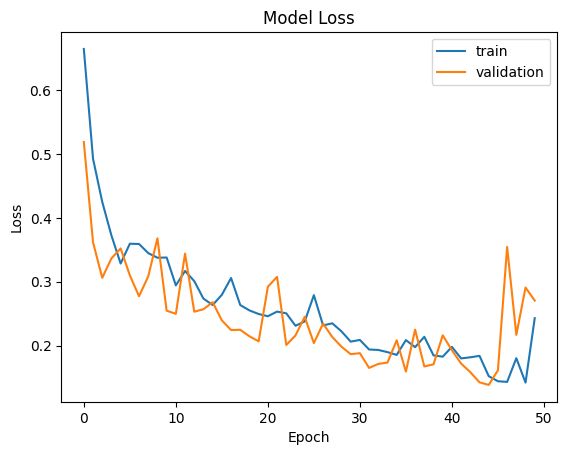

In [ ]:
plt.plot(train_model.history['loss'])
plt.plot(train_model.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

Dari hasil grafik, dapat dijelaskan bahwa loss pada training memiliki angka yang lebih kecil dibandingkan dengan loss pada validation. Tetapi, pada epoch terakhir terjadi peningkatan pada loss yang terjadi karena model yang mengalami overfitting.

**Bagian d**

**Melakukan modifikasi model, agar mendapatkan akurasi yang optimal**

In [ ]:
from tensorflow.keras.layers import BatchNormalization

model_mod = Sequential([
    Dense(256, activation='sigmoid'),
    BatchNormalization(synchronized=True),
    Dense(128, activation='sigmoid'),
    BatchNormalization(synchronized=True),
    Dense(64, activation='sigmoid'),
    BatchNormalization(synchronized=True),
    Dense(2, activation='softmax')
])

Agar mendapatkan akurasi yang optimal, dilakukan modifikasi pada model ANN yaitu memperkecil hyperparameter pada setiap hidden layer dengan membaginya lagi dengan dua dan menambahkan BatchNormalization pada setiap hidden layer. Bertujuan untuk menormalisasi setiap layer dan meningkatkan kinerja model dalam training dan validation.

In [ ]:
model_mod.compile(optimizer = Adam(learning_rate = 0.001), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

train_model_mod = model_mod.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 50)

Epoch 1/50
11/11 [==============================] - 9s 76ms/step - loss: 0.5447 - accuracy: 0.7738 - val_loss: 0.6338 - val_accuracy: 0.6905
Epoch 2/50
11/11 [==============================] - 0s 20ms/step - loss: 0.3434 - accuracy: 0.8512 - val_loss: 0.6339 - val_accuracy: 0.8095
Epoch 3/50
11/11 [==============================] - 0s 21ms/step - loss: 0.2975 - accuracy: 0.8810 - val_loss: 0.6259 - val_accuracy: 0.8095
Epoch 4/50
11/11 [==============================] - 0s 14ms/step - loss: 0.2580 - accuracy: 0.9048 - val_loss: 0.6114 - val_accuracy: 0.8333
Epoch 5/50
11/11 [==============================] - 0s 14ms/step - loss: 0.2427 - accuracy: 0.8839 - val_loss: 0.6144 - val_accuracy: 0.8810
Epoch 6/50
11/11 [==============================] - 0s 13ms/step - loss: 0.2116 - accuracy: 0.9077 - val_loss: 0.6031 - val_accuracy: 0.8571
Epoch 7/50
11/11 [==============================] - 0s 22ms/step - loss: 0.2421 - accuracy: 0.8839 - val_loss: 0.6017 - val_accuracy: 0.8810
Epoch 8/50
11

Hasilnya, didapatkan akurasi pada training dan validation meningkat daripada model yang sebelum dimodifikasi. Loss untuk training dan validation juga menurun. Berarti, model mempunyai kinerja yang bagus.

**Menampilkan grafik validation loss dan training loss dari model yang sudah dimodifikasi**

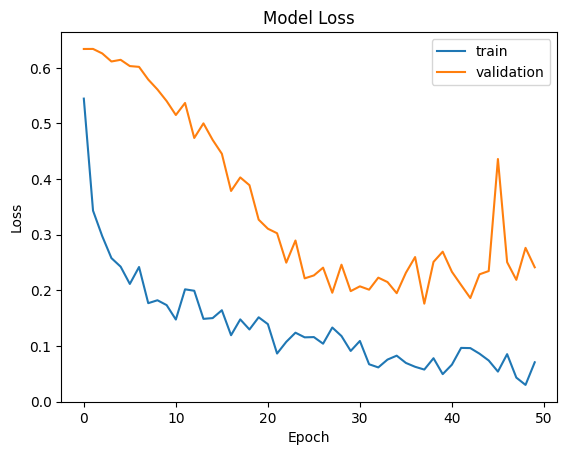

In [ ]:
plt.plot(train_model_mod.history['loss'])
plt.plot(train_model_mod.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'])
plt.show()

Pada grafik yang dihasilkan, dapat ditunjukkan terdapat penurunan loss pada training, tetapi pada validation loss tetap bertahan pada nilai 0.2 dan mengalami sedikit penurunan.

**Bagian e**

**Mengevaluasi kinerja model pada test set**

In [ ]:
eval_model = model.evaluate(x_test, y_test)
print(eval_model)

2/2 [==============================] - 0s 8ms/step - loss: 0.2771 - accuracy: 0.9048
[0.2770809531211853, 0.9047619104385376]


Didapatkan pada testing, loss yang dihasilkan kecil dan untuk accuracy yang dihasilkan cukup bagus.

In [ ]:
eval_model_mod = model_mod.evaluate(x_test, y_test)
print(eval_model_mod)

2/2 [==============================] - 0s 9ms/step - loss: 0.1366 - accuracy: 0.9524
[0.1366042196750641, 0.9523809552192688]


Dari model yang sudah dimodifikasi, accuracy pada test set mengalami kenaikan dan loss mengalami penurunan. Hal ini berarti model yang sudah dimodifikasi memiliki kinerja yang lebih baik.

**Mencari nilai accuracy, precision, recall, dan F1 score**

In [ ]:
print(f'Accuracy: {eval_model[1] :.3f}')

Accuracy: 0.905


In [ ]:
# Menghitung nilai accuracy, precision, recall, dan F1 score dari model yang belum dimodifikasi

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))
print("")
print(f"Prescision:  {precision_score(y_test, y_pred) :.3f}")
print(f"Recall: {recall_score(y_test, y_pred) :.3f}")
print(f"F1 score: {f1_score(y_test, y_pred) :.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred) :.3f}")

2/2 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.87      0.95      0.91        21
           1       0.95      0.86      0.90        21

    accuracy                           0.90        42
   macro avg       0.91      0.90      0.90        42
weighted avg       0.91      0.90      0.90        42


Prescision:  0.947
Recall: 0.857
F1 score: 0.900
Accuracy: 0.905


In [ ]:
print(f'Accuracy optimized: {eval_model_mod[1] :.3f}')

Accuracy optimized: 0.952


In [ ]:
# Menghitung nilai accuracy, precision, recall, dan F1 score dari model yang sudah dimodifikasi

from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

y_pred = model_mod.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))
print("")
print(f"Prescision:  {precision_score(y_test, y_pred) :.3f}")
print(f"Recall: {recall_score(y_test, y_pred) :.3f}")
print(f"F1 score: {f1_score(y_test, y_pred) :.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred) :.3f}")

2/2 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        21
           1       0.95      0.95      0.95        21

    accuracy                           0.95        42
   macro avg       0.95      0.95      0.95        42
weighted avg       0.95      0.95      0.95        42


Prescision:  0.952
Recall: 0.952
F1 score: 0.952
Accuracy: 0.952


In [ ]:
import tensorflow as tf

x = tf.constant([1.5, 2.7, 3.8], dtype=tf.float32)
x_casted = tf.cast(x, tf.int32)

print(x_casted)


tf.Tensor([1 2 3], shape=(3,), dtype=int32)


Pada model yang sudah dimodifikasi, nilai accuracy, precision, recall, dan F1-score yang dihasilkan jauh lebih baik dibandingkan dengan model yang sebelum dimodifikasi. Karena hasil yang didapatkan baik, dapat ditunjukkan bahwa model yang setelah dimodifikasi memiliki performa yang lebih baik.